# Almacenamiento de datos

## Introducción

Vamos a generar una BBDD Relacional para el almacenamiento de los registros que hemos obtenido hasta ahora.

En este momento del proyecto (mayo/23) prepararemos una base de datos con 2 Tablas y posteriormente generaremos una tercera tabla con las variables que habremos generado en el notebook de Engineering para generar #tags. 

## Librerías

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
# import mysql.connector


In [2]:
os.chdir(os.path.split(os.getcwd())[0])
folder=os.getcwd()
folder

'd:\\Data_science\\Javier\\Repositorios\\Proyecto_tienda_online\\src'

## Estructuras de la BBDD

![Estructura_tablas](../Resources/image/Relacion_tablas.jpg)

### a.- Realizando la conexión a la Base de Datos.

In [7]:
# Conectamos con la base de datos
conn = sqlite3.connect("Data/online_shop.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
cursor = conn.cursor()

### b.- Funciones para obtener datos y ver en un dataframe

In [8]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    cursor.execute(query)

    # Almacena los datos de la query 
    ans = cursor.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor.description]

    return pd.DataFrame(ans,columns=names)

## 1. Construyendo la BBDD

In [6]:
# res = cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
# res = cursor.execute("SELECT name FROM sqlite_master WHERE type='view'")
for name in res:
    print(name[0])

COMMENTS_PER_PRODUCT


#### PRODUCT

In [6]:
query = '''
CREATE TABLE PRODUCT  (
    ID VARCHAR (3),
    PRODUCT VARCHAR (100),
    SLOGAN VARCHAR (100),
    DESCRIPTION VARCHAR (250),
    CHARACTERISTICS VARCHAR (250),
    LISTA_URL VARCHAR (50),
    REGULAR_PRICE INT (3),
    DISCOUNT_PRICE INT (3),
    PRIMARY KEY (ID)
)

'''


cursor.execute(query)

#### COMMENTS

In [7]:
query = '''
CREATE TABLE COMMENT  (
    ID_COMMENT VARCHAR (5),
    ID_PRODUCT VARCHAR (3),
    DATE DATETIME (100),
    RATIO INT (2),
    USERS VARCHAR (50),
    COMMENT VARCHAR (250), 
    PRIMARY KEY (ID_COMMENT),
    FOREIGN KEY (ID_PRODUCT) REFERENCES PRODUCT (ID)
)

'''

cursor.execute(query)

#### TAGS

In [8]:
query = '''
CREATE TABLE TAGS  (
    ID VARCHAR (3),
    JUGUETES INT(1),
    MUEBLES INT(1),
    LENCERIA INT(1),
    MASCULINO INT(1),
    FEMININO INT(1),
    ANAL INT(1),
    BDSM INT(1),
    AMENITIES INT(1),
    PRIMARY KEY (ID),
    FOREIGN KEY (ID) REFERENCES PRODUCT (ID)
)

'''

# En esta tabla hay que convertir primeramente los booleanos en 0 y 1 para guardarla.
# También es importante tener esto en cuenta a la hora de extraer la información.
cursor.execute(query)

### b.- Cargando los datos dentro de la BBDD

In [10]:
df_products=pd.read_csv(r'Data\productos.csv')
print("Long. dataframe",len(df_products.columns))
df_products.head()

Long. dataframe 8


,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,LISTA_URL,REGULAR_PRICE,DISCOUNT_PRICE
0,0,Desliz! Lubricante íntimo de agua 100ml,NaN,"Algunos lubricantes son un poco densos, otros ...",Bote de 100ml de venta exclusiva en amantis.ne...,https://www.amantis.net/desliz-lubricante-inti...,9.99,7.99
1,1,LIZO 2,Dildo de suave silicona en 3 tamaños,"En un azulejo de la cocina, en una puerta, en ...",Material: silicona médica de máxima calidadDim...,https://www.amantis.net/lizo-2-dildo-suave-sil...,59.99,17.99
2,2,FOXTAIL,plug anal cola de zorro de 35cm,Deja volar la imaginación y saca tu lado más s...,Tamaño plug S: 6.6cm Max Dia.: 2.8cmCola de pe...,https://www.amantis.net/foxtail-plug-anal-cola...,29.99,9.99
3,3,Vibrador Líquido con sabor Desliz! VIBRAGEL 30ml,hormigueo oral,¿Alguna vez has sentido un hormigueo en lo más...,"Ingredientes: agua, glicerina, hidroxietilcelu...",https://www.amantis.net/desliz-vibragel-liquid...,29.99,9.99
4,4,Bacanal FORTE TARRO 200ml,lubricante anal concentrado con aloe,Si alguna vez has pensado que el sexo anal es ...,Su textura no es grasa y no mancha. Compatible...,https://www.amantis.net/bacanal-forte-tarro-20...,24.99,24.99


In [11]:
df_comments=pd.read_csv(r'Data\comentarios.csv',index_col=False)
print("Long. dataframe",len(df_comments.columns))
df_comments.rename(columns={"ID":"ID_PRODUCT","Unnamed: 0":"ID_COMMENT"},inplace=True)
df_comments.head

Long. dataframe 6


<bound method NDFrame.head of        ID_COMMENT  ID_PRODUCT                        DATE  RATIO  \
0               0           0        jueves 18 mayo, 2023      5   
1               1           0    miércoles 12 abril, 2023      5   
2               2           0        lunes 10 abril, 2023      5   
3               3           0        lunes 23 enero, 2023      5   
4               4           0    miércoles 11 enero, 2023      5   
...           ...         ...                         ...    ...   
10328       11370         575      viernes 22 enero, 2016      5   
10329       11371         575  viernes 26 diciembre, 2014      4   
10330       11372         575   martes 09 diciembre, 2014      4   
10331       11373         575   martes 09 diciembre, 2014      5   
10332       11374         575   jueves 04 diciembre, 2014      5   

              USERS                                            COMMENT  
0             David  Muy recomendable. El bote cunde, hidrata muy b...  
1      

In [12]:
lista_products= df_products.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO PRODUCT VALUES (?,?,?,?,?,?,?,?)", lista_products)           #   Salvamos directamente todos los datos en la tabla PRODUCTS

lista_comments= df_comments.values.tolist()                                                #   Pasamos a lista el dataframe

cursor.executemany("INSERT INTO COMMENT VALUES (?,?,?,?,?,?)", lista_comments)                 #   Salvamos directamente todos los datos en la tabla COMMENTS

In [13]:
conn.commit()
cursor.close()
conn.close()

### Generamos las *views* oportunas para el tratamiento de los datos. 

In [22]:
view='''CREATE VIEW COMMENTS_PER_PRODUCT AS SELECT PRODUCT.PRODUCT,COMMENT.DATE,COMMENT.USERS,COMMENT.RATIO ,COMMENT.COMMENT FROM COMMENT JOIN PRODUCT ON PRODUCT.ID=COMMENT.ID_PRODUCT'''
cursor.execute(view)

## 2. Realizando consultas para visualizar datos.

Vamos a verificar los datos cargados visualizando los 10 primeros registros en cada TABLA

In [9]:
query='''SELECT * FROM PRODUCT LIMIT (10)'''
sql_query(query)

,ID,PRODUCT,SLOGAN,DESCRIPTION,CHARACTERISTICS,LISTA_URL,REGULAR_PRICE,DISCOUNT_PRICE
0,0,Desliz! Lubricante íntimo de agua 100ml,None,"Algunos lubricantes son un poco densos, otros ...",Bote de 100ml de venta exclusiva en amantis.ne...,https://www.amantis.net/desliz-lubricante-inti...,9.99,7.99
1,1,LIZO 2,Dildo de suave silicona en 3 tamaños,"En un azulejo de la cocina, en una puerta, en ...",Material: silicona médica de máxima calidadDim...,https://www.amantis.net/lizo-2-dildo-suave-sil...,59.99,17.99
2,2,FOXTAIL,plug anal cola de zorro de 35cm,Deja volar la imaginación y saca tu lado más s...,Tamaño plug S: 6.6cm Max Dia.: 2.8cmCola de pe...,https://www.amantis.net/foxtail-plug-anal-cola...,29.99,9.99
3,3,Vibrador Líquido con sabor Desliz! VIBRAGEL 30ml,hormigueo oral,¿Alguna vez has sentido un hormigueo en lo más...,"Ingredientes: agua, glicerina, hidroxietilcelu...",https://www.amantis.net/desliz-vibragel-liquid...,29.99,9.99
4,4,Bacanal FORTE TARRO 200ml,lubricante anal concentrado con aloe,Si alguna vez has pensado que el sexo anal es ...,Su textura no es grasa y no mancha. Compatible...,https://www.amantis.net/bacanal-forte-tarro-20...,24.99,24.99
5,5,VINTAGE,Vibrador clásico metalizado,¡Qué tendrán los ochenta que nos encantan! Los...,Bala metalizada14 x 2´7cm Vibración regulable ...,https://www.amantis.net/vintage-vibrador-clasi...,16.99,5.99
6,6,TOBOGANE HOT RABBIT,el superventas de amantis ¡mejorado!,Vuelve nuestro vibrador de doble estimulación ...,"Medidas: 19cm (11cm insertables) y 3,3cm/ 2,2c...",https://www.amantis.net/tobogane-hot-rabbit-el...,89.99,39.99
7,7,CRISTALINO XL,gran dildo transparente de 22cm,¿Te gusta hacer bandera de la transparencia en...,Material: TPR libre de ftalatos y seguro con t...,https://www.amantis.net/cristalino-xl-gran-dil...,49.99,17.99
8,8,FLOGGY,Flogger BDSM de piel vegana,En amantis contamos con muchos potenciadores d...,Piel sintéticaMedidas: 48 cmApto para veganosC...,https://www.amantis.net/floggy-flogger-bdsm-pi...,18.99,4.99
9,9,COCÓ,body de tirantes con orificio estratégico de a...,Te encanta cómo sienta y cómo tersa tu piel la...,Pieza única; tejido en malla sin cierres ni co...,https://www.amantis.net/coco-body-tirantes-ori...,24.99,5.99


In [10]:
query='''SELECT * FROM COMMENT LIMIT (10)'''
sql_query(query)

,ID_COMMENT,ID_PRODUCT,DATE,RATIO,USERS,COMMENT
0,0,0,"jueves 18 mayo, 2023",5,David,"Muy recomendable. El bote cunde, hidrata muy b..."
1,1,0,"miércoles 12 abril, 2023",5,Ferran,Es la primera vez que compro este lubricante y...
2,2,0,"lunes 10 abril, 2023",5,Sergio,He probado varios tipos de lubricante y este d...
3,3,0,"lunes 23 enero, 2023",5,Jaime,Perfecto para embadurnarte el pincelin y meter...
4,4,0,"miércoles 11 enero, 2023",5,YASMINA,"Buen producto, tanto para el cuerpo a cuerpo c..."
5,5,0,"jueves 05 enero, 2023",5,Irene,"Tal y como se describe, simple y efectivo, nos..."
6,6,0,"jueves 22 diciembre, 2022",4,Marta,Cumple su funcion como lubricante con base de ...
7,7,0,"martes 13 diciembre, 2022",3,Francisco Javier,Fue el primer lubricante que compramos en esta...
8,8,0,"domingo 04 diciembre, 2022",5,Meri,El lubricante Desliz de agua es indispensable ...
9,9,0,"domingo 20 noviembre, 2022",5,Enrique,"Buenisimo lubricante calidad precio, desde que..."


In [11]:
query='''SELECT * FROM TAGS LIMIT (10)'''
sql_query(query)

,ID,JUGUETES,MUEBLES,LENCERIA,MASCULINO,FEMININO,ANAL,BDSM,AMENITIES


In [12]:
query='''SELECT * FROM COMMENTS_PER_PRODUCT LIMIT (10)'''
sql_query(query)

,PRODUCT,DATE,USERS,RATIO,COMMENT
0,Desliz! Lubricante íntimo de agua 100ml,"jueves 18 mayo, 2023",David,5,"Muy recomendable. El bote cunde, hidrata muy b..."
1,Desliz! Lubricante íntimo de agua 100ml,"miércoles 12 abril, 2023",Ferran,5,Es la primera vez que compro este lubricante y...
2,Desliz! Lubricante íntimo de agua 100ml,"lunes 10 abril, 2023",Sergio,5,He probado varios tipos de lubricante y este d...
3,Desliz! Lubricante íntimo de agua 100ml,"lunes 23 enero, 2023",Jaime,5,Perfecto para embadurnarte el pincelin y meter...
4,Desliz! Lubricante íntimo de agua 100ml,"miércoles 11 enero, 2023",YASMINA,5,"Buen producto, tanto para el cuerpo a cuerpo c..."
5,Desliz! Lubricante íntimo de agua 100ml,"jueves 05 enero, 2023",Irene,5,"Tal y como se describe, simple y efectivo, nos..."
6,Desliz! Lubricante íntimo de agua 100ml,"jueves 22 diciembre, 2022",Marta,4,Cumple su funcion como lubricante con base de ...
7,Desliz! Lubricante íntimo de agua 100ml,"martes 13 diciembre, 2022",Francisco Javier,3,Fue el primer lubricante que compramos en esta...
8,Desliz! Lubricante íntimo de agua 100ml,"domingo 04 diciembre, 2022",Meri,5,El lubricante Desliz de agua es indispensable ...
9,Desliz! Lubricante íntimo de agua 100ml,"domingo 20 noviembre, 2022",Enrique,5,"Buenisimo lubricante calidad precio, desde que..."


### Vamos a evaluar los productos en función del descuento que se aplica:

#### Estudio sobre los descuentos que se aplican.

#### Estudio sobre las fechas de los comentarios que se realizan.

#### Estudio sobre el ratio de los comentarios que se realizan.

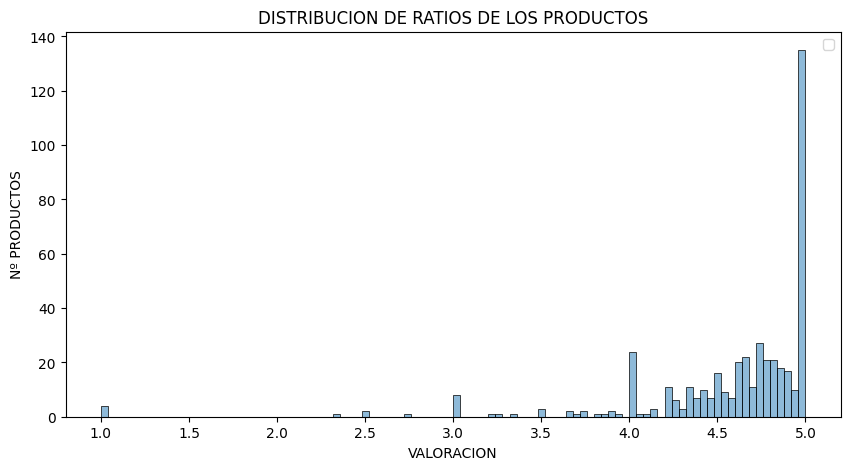

In [44]:
plt.figure(figsize=(10,5))
query='''SELECT PRODUCT,avg(RATIO) as PROM FROM COMMENTS_PER_PRODUCT group BY PRODUCT ORDER BY avg(RATIO) DESC'''
sns.histplot(data=sql_query(query),bins=100)
plt.legend("")
plt.ylabel("Nº PRODUCTOS")
plt.xlabel("VALORACION")
plt.title("DISTRIBUCION DE RATIOS DE LOS PRODUCTOS");

En general se puede observar que los productos se encuentran entre 4.0 y 5.0. 

Valores por debajo de 4.0 son anomalos.

También se puede ver que principalmente la valoración es 5.0, esto también se puede ver con un describe, donde el último cuartil es todo 5.0

In [45]:
sql_query(query).describe()

,PROM
count,450.000000
mean,4.595474
std,0.573370
min,1.000000
25%,4.470588
50%,4.750000
75%,5.000000
max,5.000000


#### Estudio sobre los usuarios de los comentarios que se realizan.

En este punto hay que tener en cuenta que tenemos pendiente ahora mismo de generar usuarios distintos cuando se encuentran el mismo usuario dentro del mismo producto, ya que no tiene sentido que sea el mismo usuario y hay que discriminarlo. 

Lo mejor en este punto sería tener users por nick y que esté no pudiera ser el mismo, ya que permitiría poder discernir la autoridad de cada comentario. 

## Cerramos la BBDD.

In [47]:
conn.commit()
cursor.close()
conn.close()